In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import mnist

In [2]:
(X_train_, Y_train), (X_test_, Y_test) = mnist.load_data()
print(X_train_.shape) 
print(Y_train.shape)
print(X_test_.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
X_train = X_train_ / 255
X_test = X_test_ / 255
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [4]:
def plot_pie(Y):
    labels, sizes = np.unique(Y,  return_counts= True) 
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels = labels, shadow = True)
    ax1.axis('equal')
    plt.show()

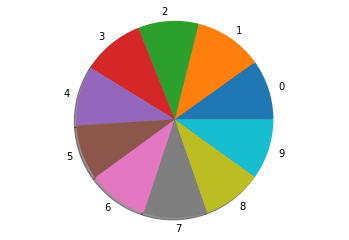

In [5]:
plot_pie(Y_train)

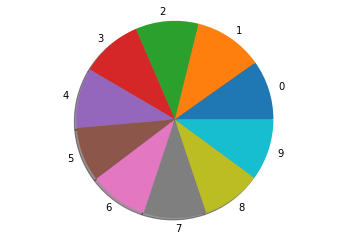

In [6]:
plot_pie(Y_test)

In [7]:
def Model(input_shape, classes):
    input = tf.keras.layers.Input(shape = input_shape)
    x = tf.keras.layers.Conv2D(filters = 32, kernel_size= (3, 3))(input)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2)(x)
    x = tf.keras.layers.BatchNormalization(axis = -1)(x)

    x = tf.keras.layers.Conv2D(filters = 64, kernel_size= (3, 3))(input)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2)(x)
    x = tf.keras.layers.BatchNormalization(axis = -1)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(20, activation= 'relu')(x)
    x = tf.keras.layers.Dropout(rate = 0.3)(x)
    output = tf.keras.layers.Dense(10, activation = 'softmax')(x)

    return tf.keras.models.Model(inputs = [input], outputs = [output])


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 20)               

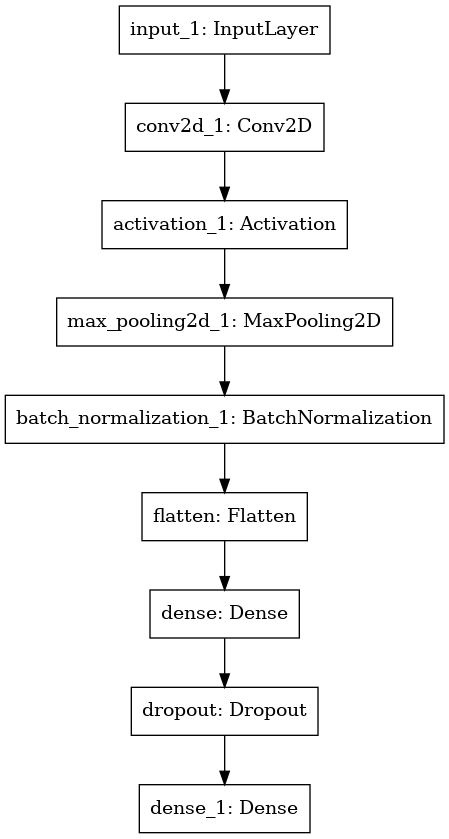

In [8]:
input_shape = (28,28,1)
classes = 10
model = Model(input_shape, classes)
model.summary()
tf.keras.utils.plot_model(model, to_file = 'model.png')

In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.0002), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [10]:
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('val_acc') >= 0.99:
            print("Model accuracy more than 97 % .. stopping training!")
            self.model.stop_training = True

stop_training_callback = my_callbacks()

In [12]:
history = model.fit(X_train, Y_train,batch_size = 50, validation_data = (X_test,Y_test), epochs = 20, callbacks = [stop_training_callback])

Epoch 1/20
1200/1200 [==============================] - 28s 23ms/step - loss: 0.5487 - acc: 0.8177 - val_loss: 0.1151 - val_acc: 0.9684
Epoch 2/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.2714 - acc: 0.9118 - val_loss: 0.0798 - val_acc: 0.9771
Epoch 3/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.2123 - acc: 0.9317 - val_loss: 0.0671 - val_acc: 0.9785
Epoch 4/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.1772 - acc: 0.9413 - val_loss: 0.0572 - val_acc: 0.9823
Epoch 5/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.1539 - acc: 0.9494 - val_loss: 0.0536 - val_acc: 0.9825
Epoch 6/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.1375 - acc: 0.9540 - val_loss: 0.0560 - val_acc: 0.9837
Epoch 7/20
1200/1200 [==============================] - 29s 24ms/step - loss: 0.1255 - acc: 0.9579 - val_loss: 0.0554 - val_acc: 0.9818
Epoch 8/20
1200/1200 [==========================

In [11]:
model.load_weights('model_weights_0.9848_val_acc.h5')

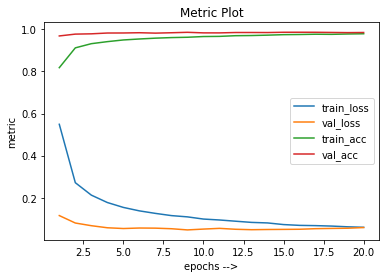

In [13]:
epochs = np.arange(1, len(history.history['loss'])+1,1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, train_loss, label = 'train_loss')
plt.plot(epochs, val_loss, label = 'val_loss')
plt.plot(epochs, train_acc, label = 'train_acc')
plt.plot(epochs, val_acc, label = 'val_acc')

plt.title('Metric Plot')
plt.xlabel('epochs -->')
plt.ylabel('metric')
plt.legend()
plt.show()

In [12]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)
predictions = predictions.reshape(len(predictions))
Y_true = Y_test.reshape(len(Y_test))

In [16]:
wrong_indices = [i for i,v in enumerate(predictions) if predictions[i] != Y_true[i]]
correct_indices = [i for i,v in enumerate(predictions) if predictions[i] == Y_true[i]]

In [17]:
print('Number of incorrect predictions :', len(wrong_indices))
print('Number of correct predictions :', len(correct_indices))

Number of incorrect predictions : 152
Number of correct predictions : 9848


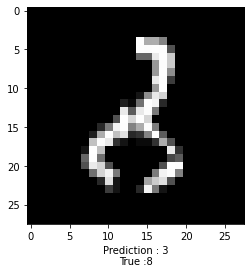

In [18]:
i = np.random.randint(0,len(wrong_indices))
index = wrong_indices[i]
plt.imshow(X_test[index], cmap = 'gray')
plt.xlabel(f"Prediction : {predictions[index]}\nTrue :{Y_true[index]}")
plt.show()

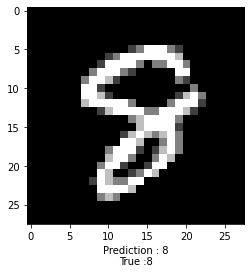

In [19]:
i = np.random.randint(0,len(correct_indices))
index = correct_indices[i]
plt.imshow(X_test[index], cmap = 'gray')
plt.xlabel(f"Prediction : {predictions[index]}\nTrue :{Y_true[index]}")
plt.show()

In [27]:
model.save_weights('model_weights_0.9848_val_acc.h5')

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(predictions, Y_true)
print(confusion_matrix)

[[ 975    0    1    0    0    1    3    0    3    2]
 [   1 1130    4    0    0    1    3    4    2    0]
 [   1    1 1010    2    1    0    0   10    0    1]
 [   0    1   11 1001    0    5    0    3    5    3]
 [   0    0    1    0  971    0    2    1    2   11]
 [   1    1    0    4    0  882    5    0    4    8]
 [   1    1    1    0    5    2  944    0    1    0]
 [   1    1    3    2    1    0    0 1008    2    7]
 [   0    0    1    1    1    1    1    0  953    3]
 [   0    0    0    0    3    0    0    2    2  974]]


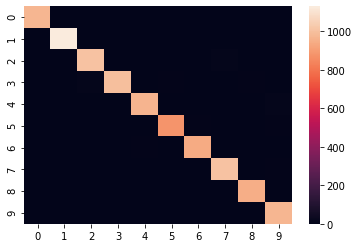

In [21]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix)
plt.show()